In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.shape

(7043, 21)

In [ ]:

for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in gender: ['Female' 'Male']
Unique values in SeniorCitizen: [0 1]
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' '

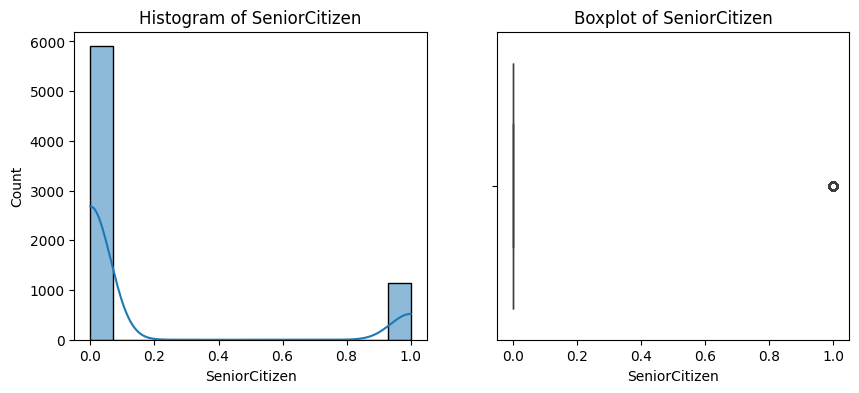

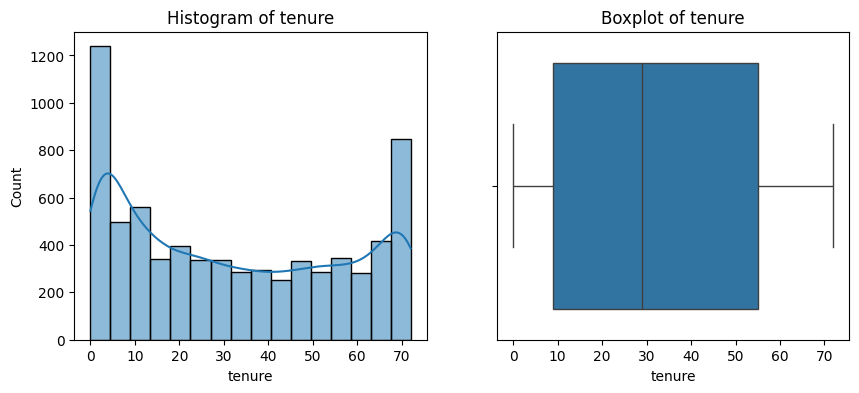

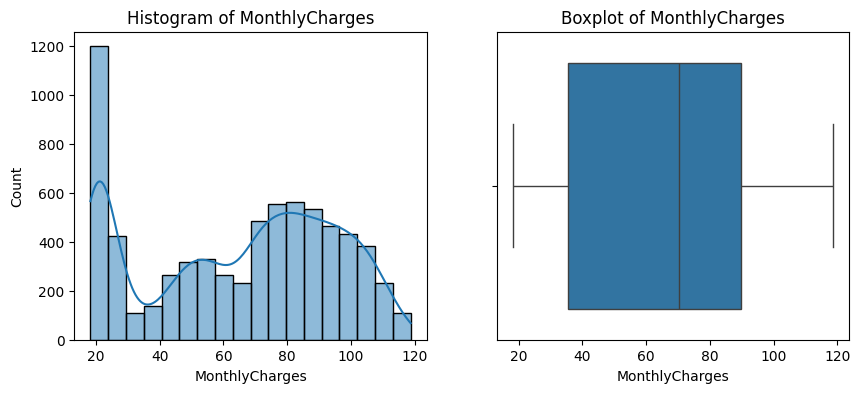

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

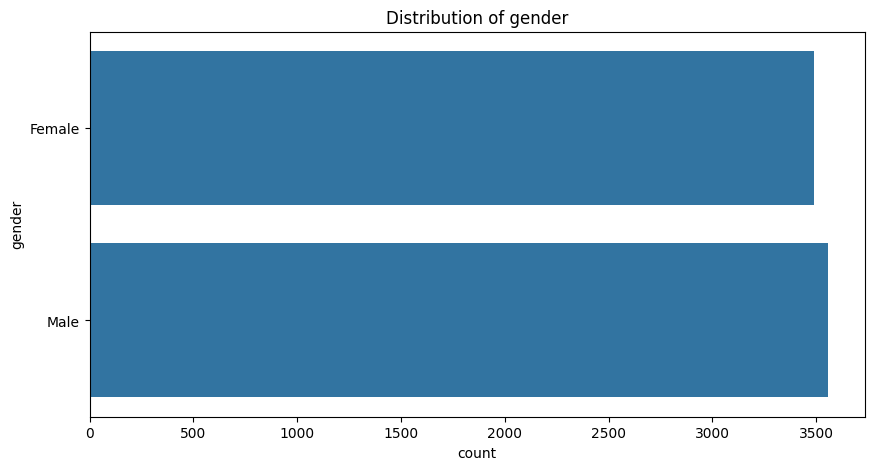

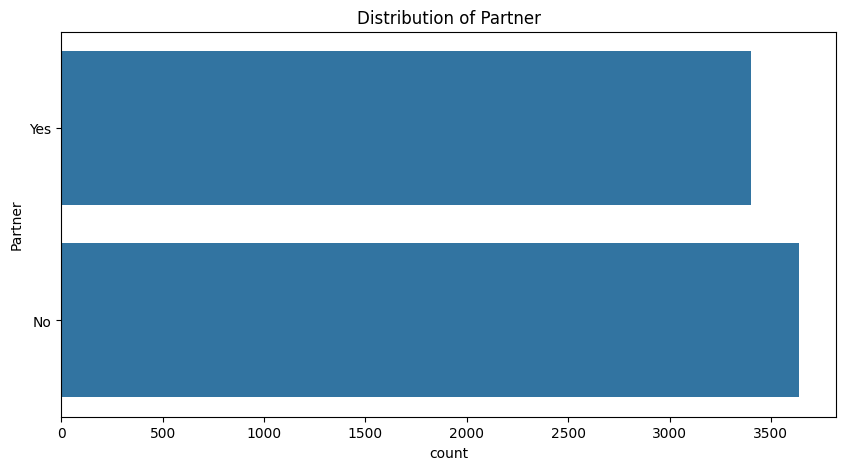

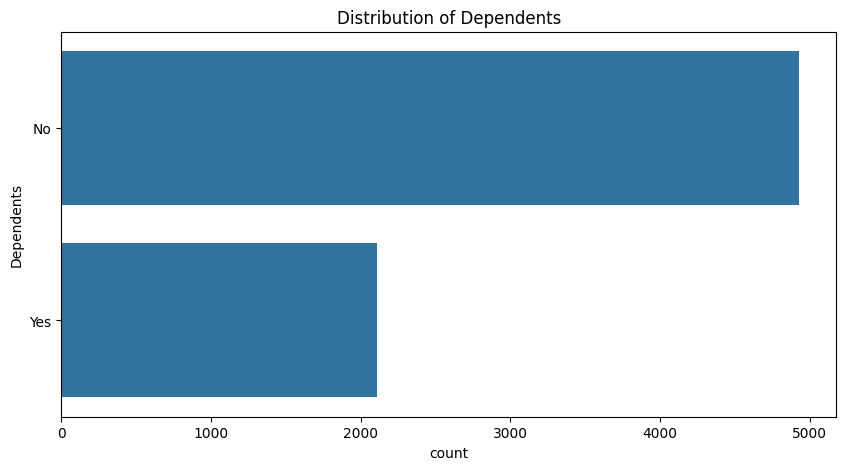

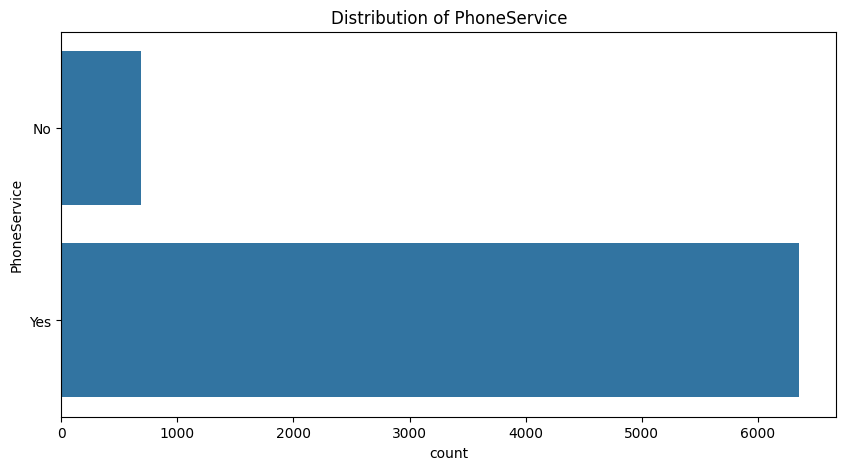

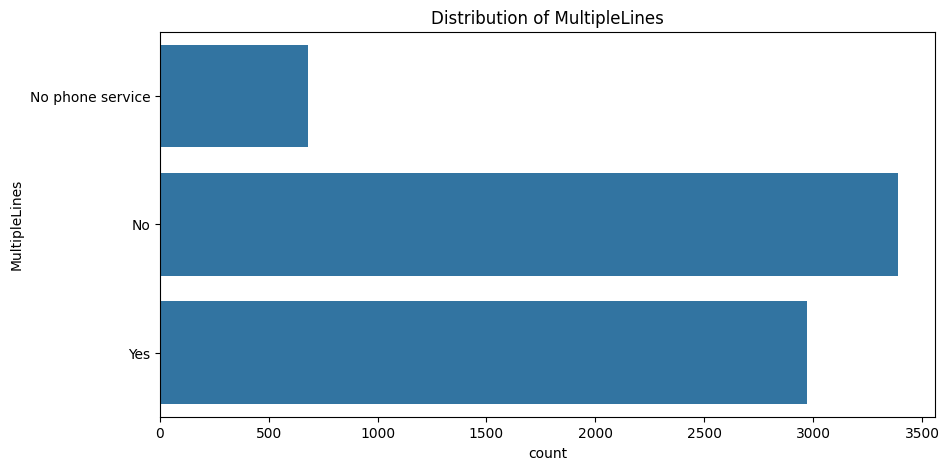

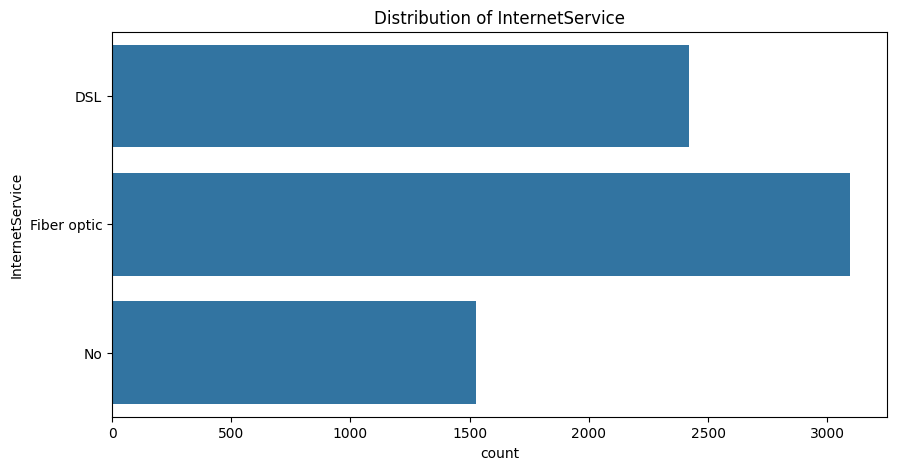

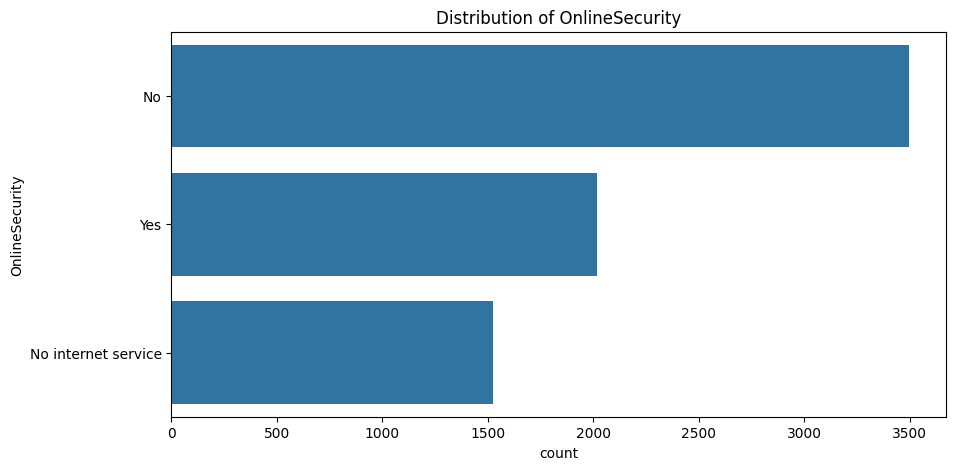

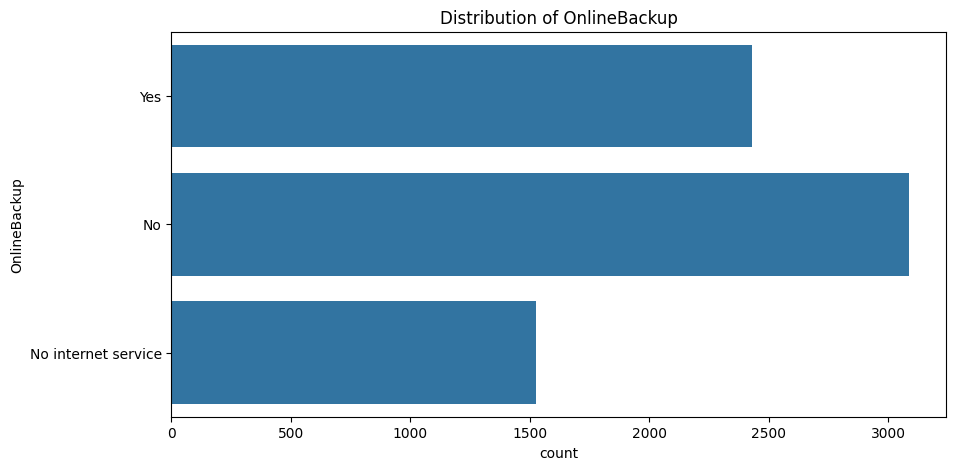

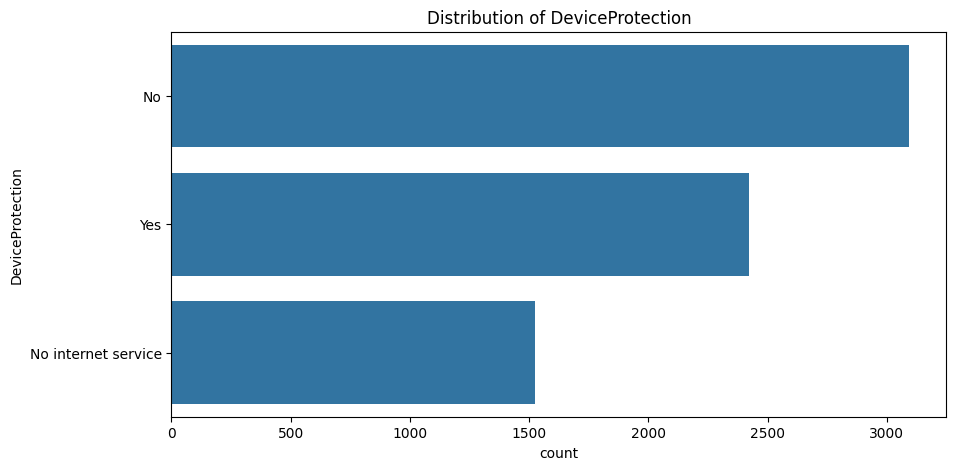

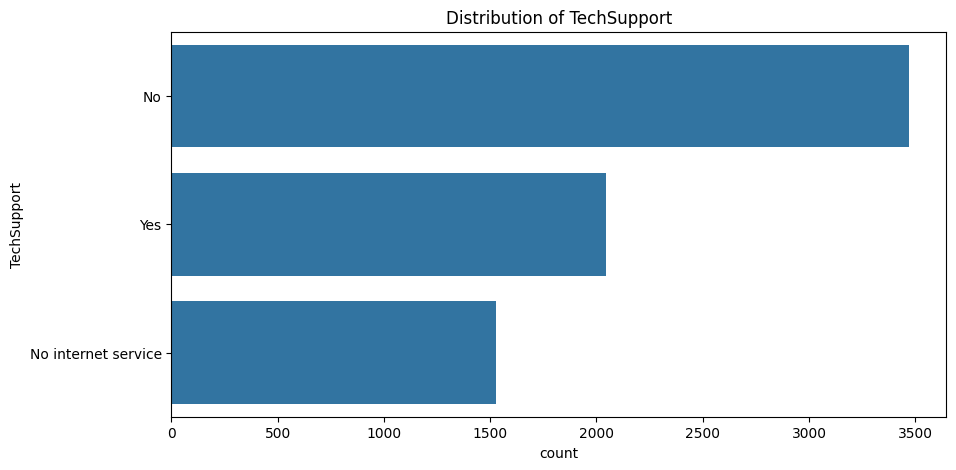

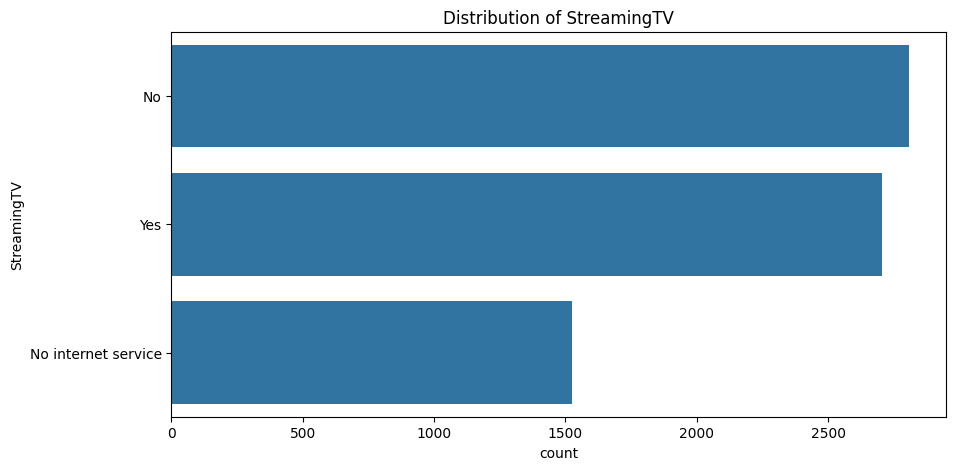

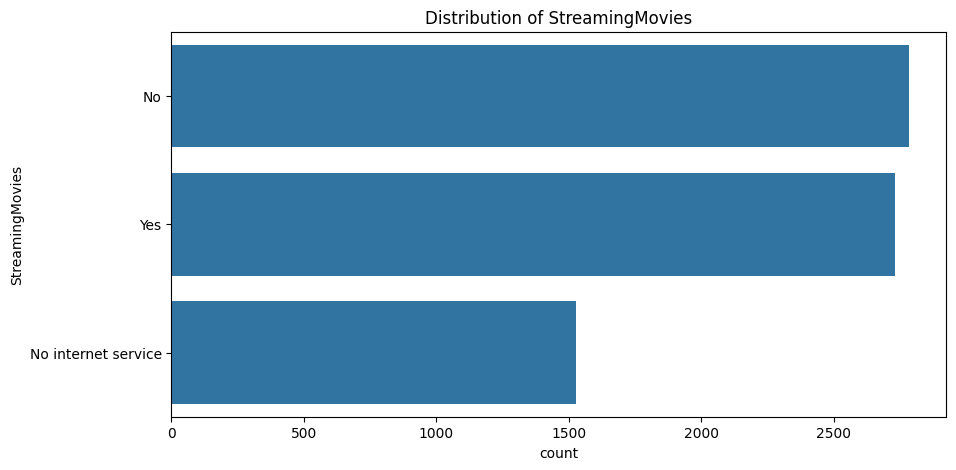

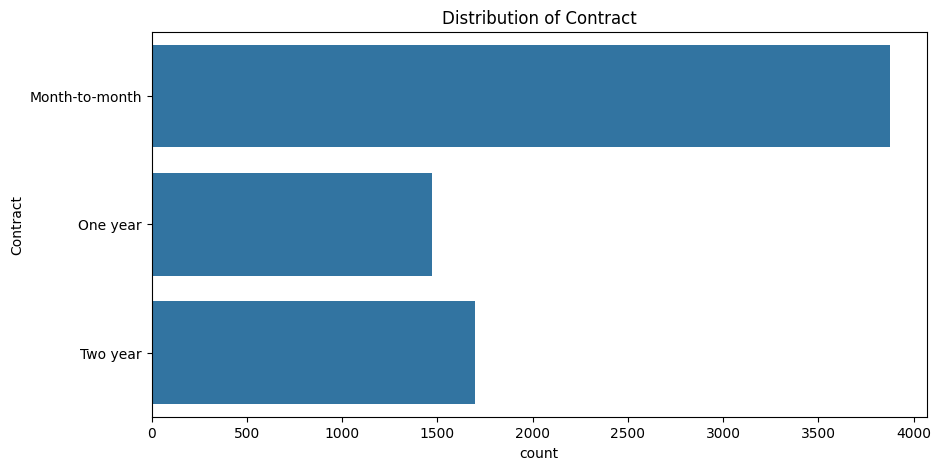

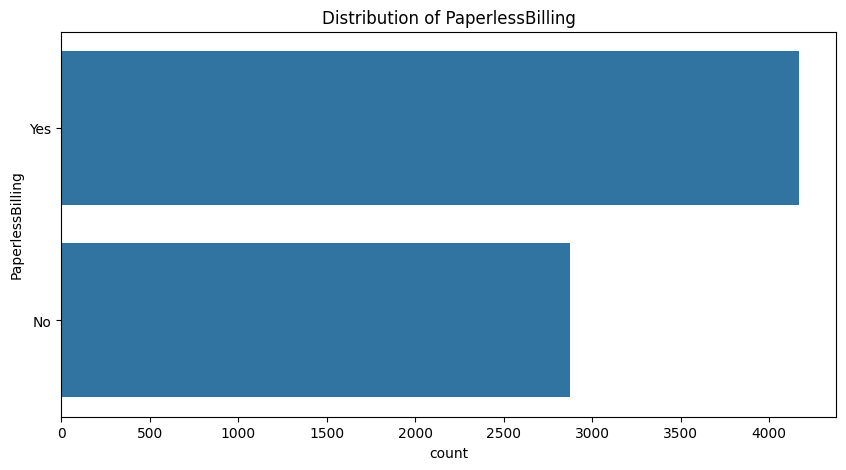

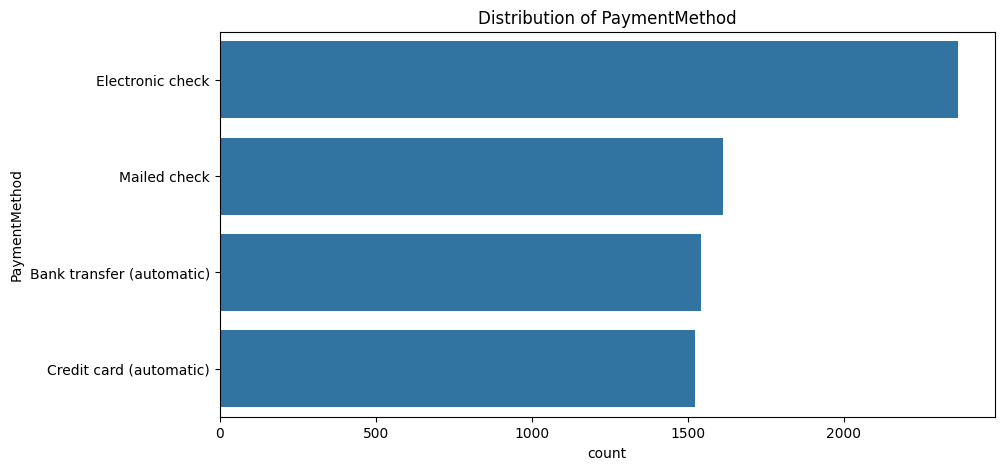

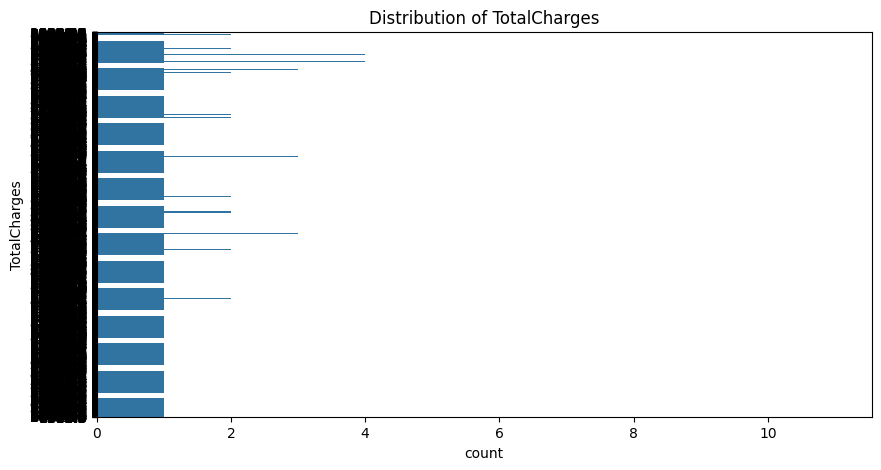

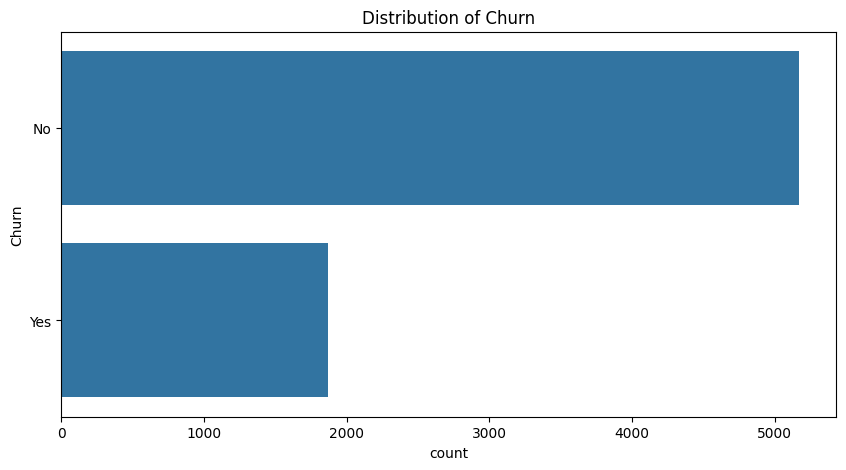

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.drop('customerID')

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
binary_features = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for feature in binary_features:
    df[feature] = df[feature].map({'Yes': 1, 'No': 0})

# Encoding categorical features
categorical_features = df.select_dtypes(include=['object']).columns.drop('customerID')
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)


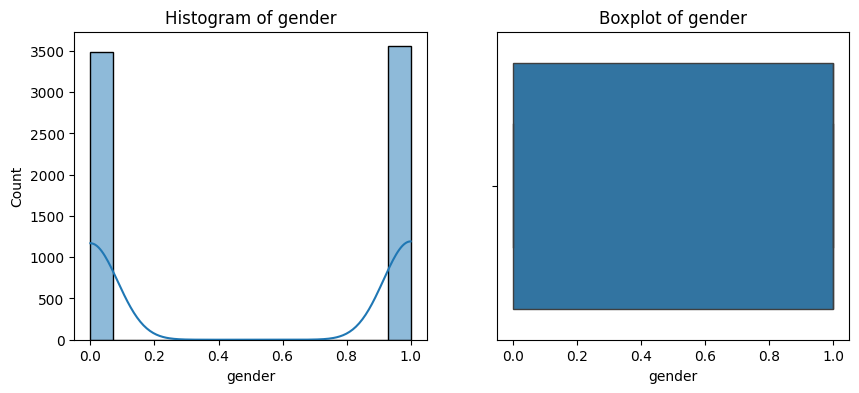

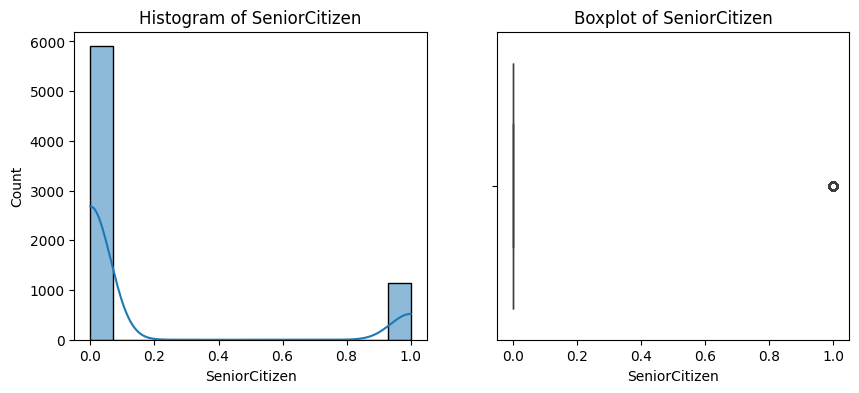

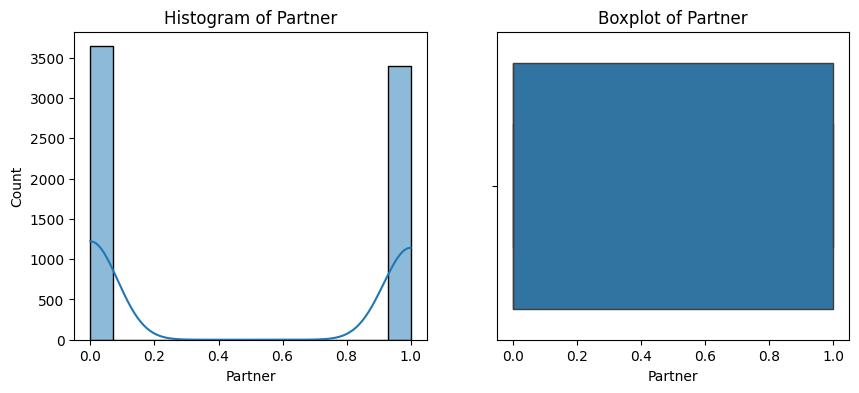

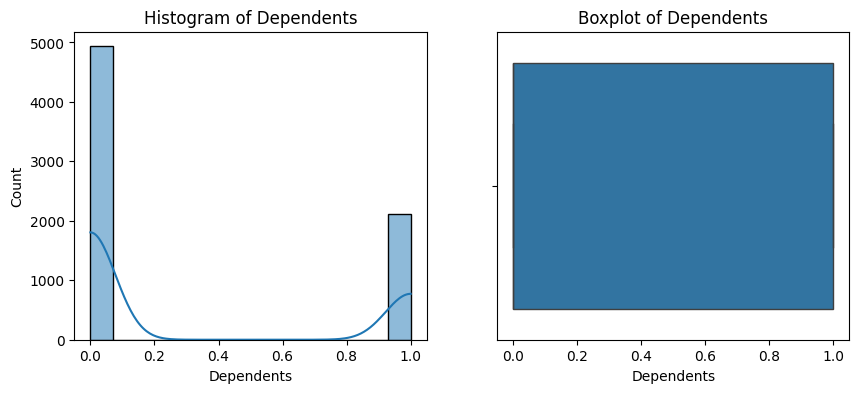

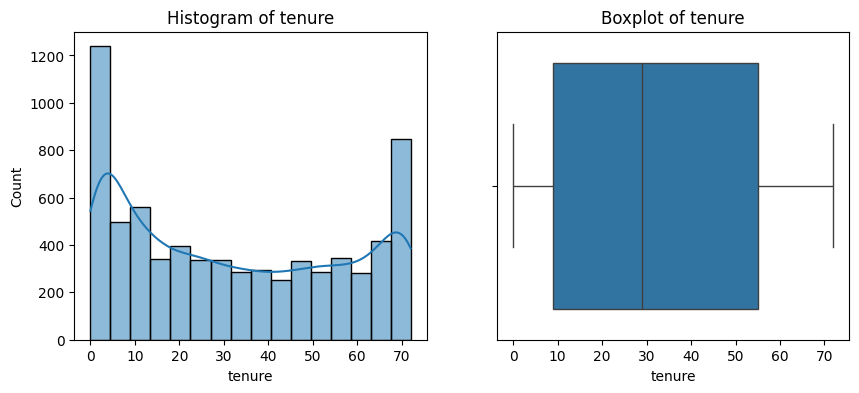

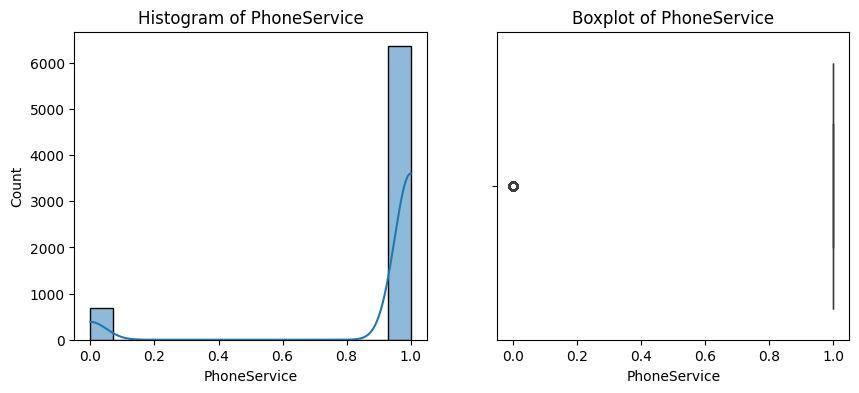

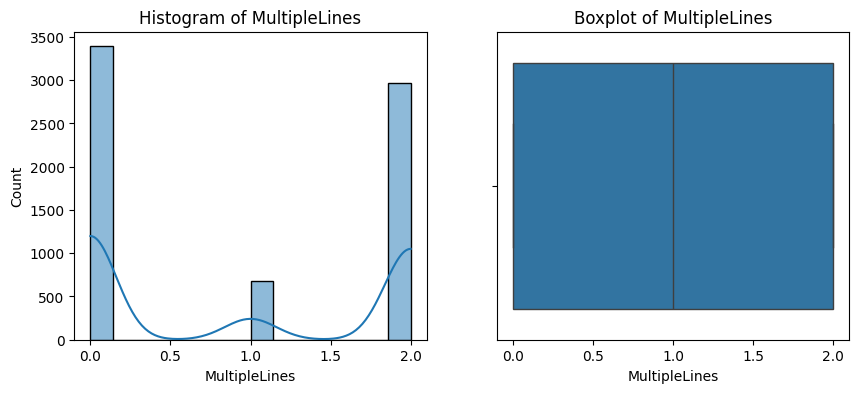

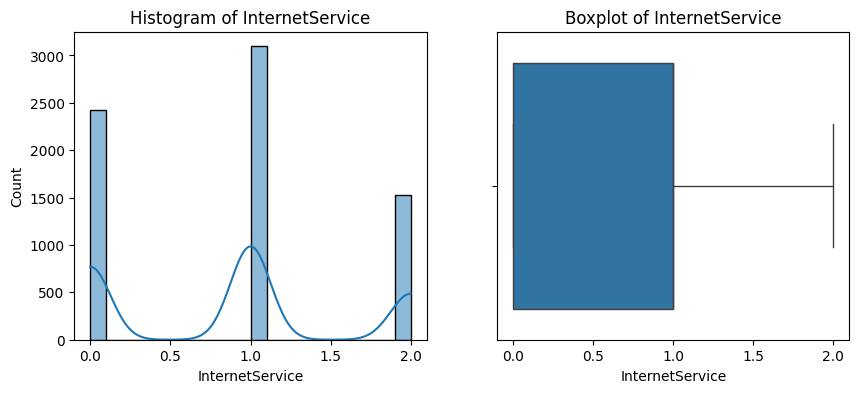

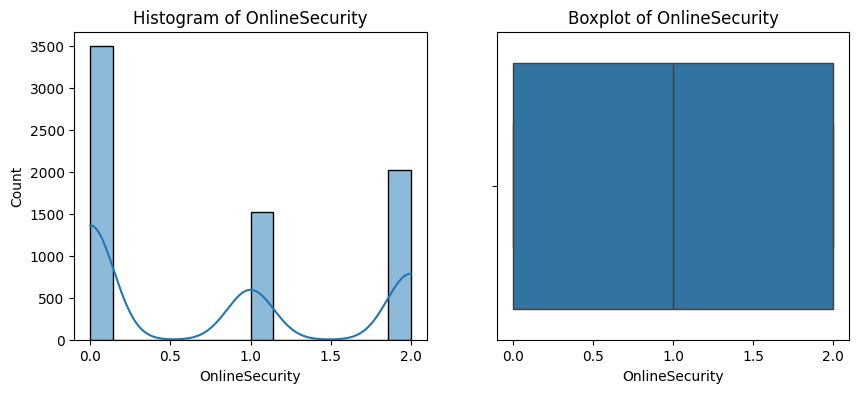

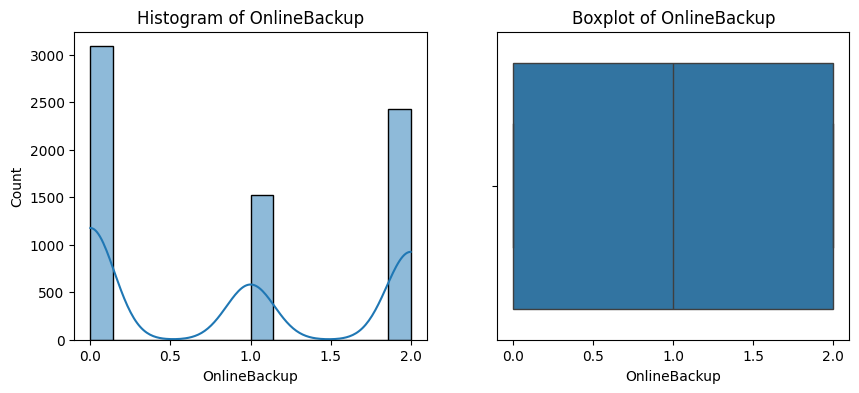

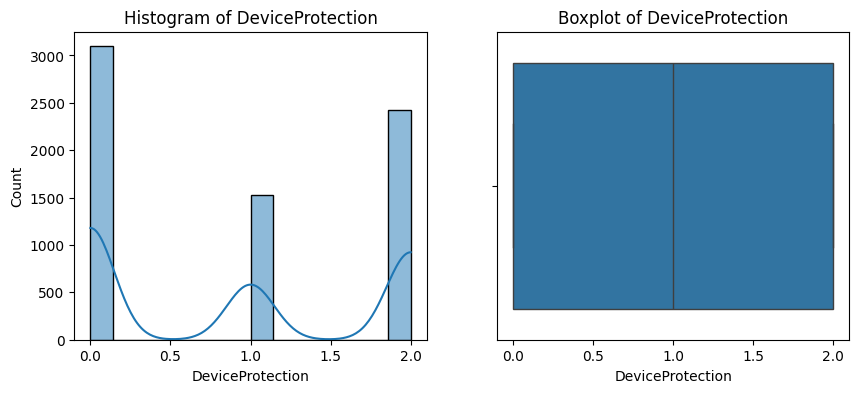

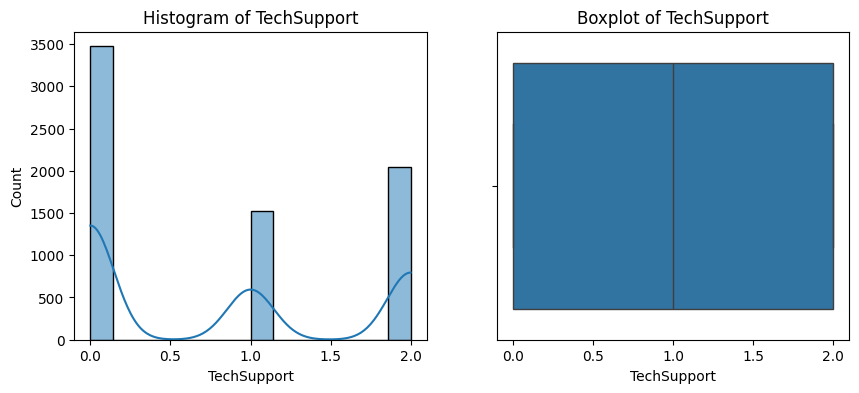

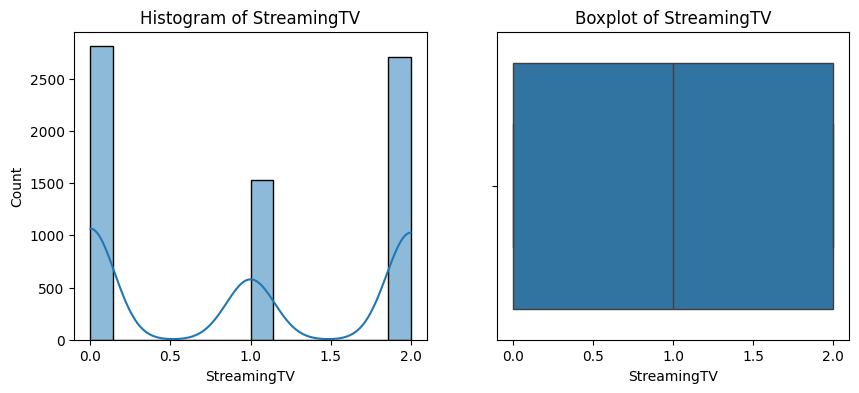

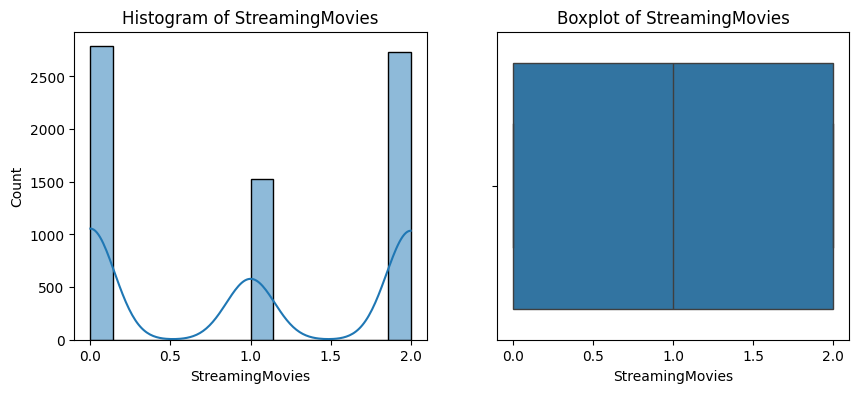

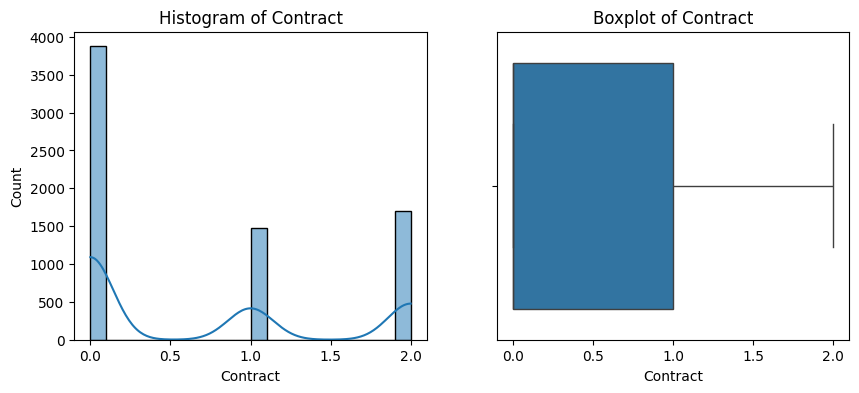

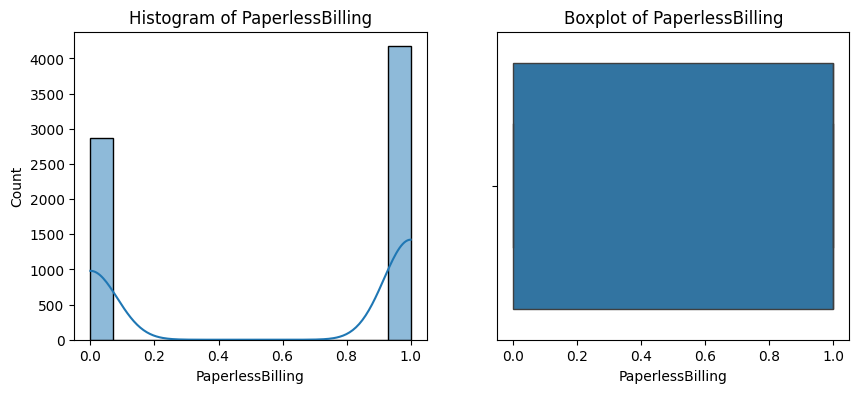

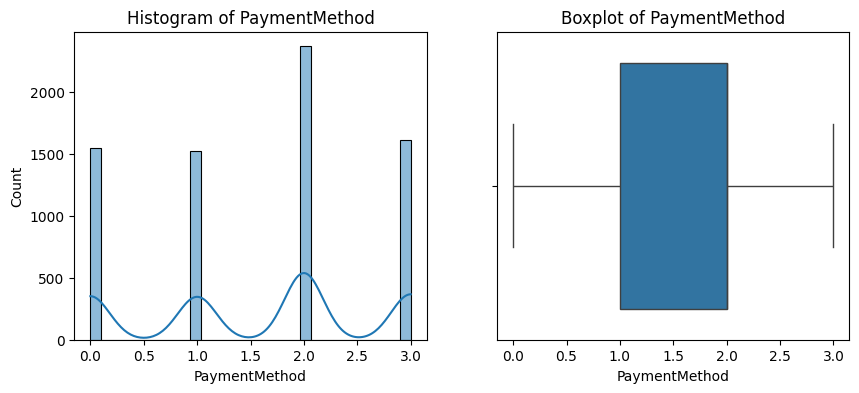

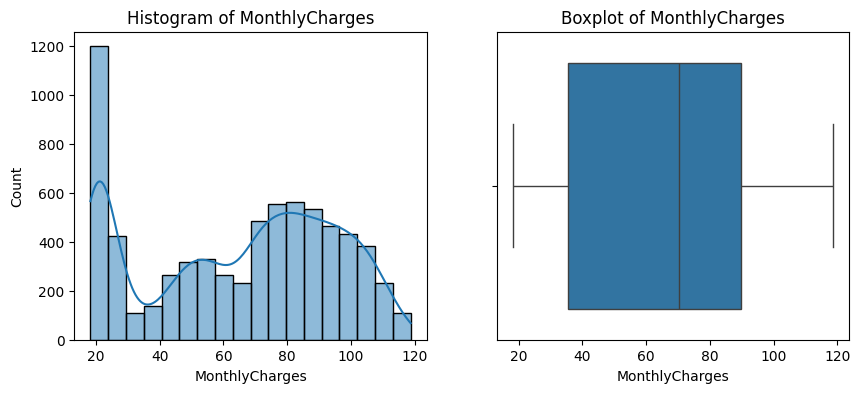

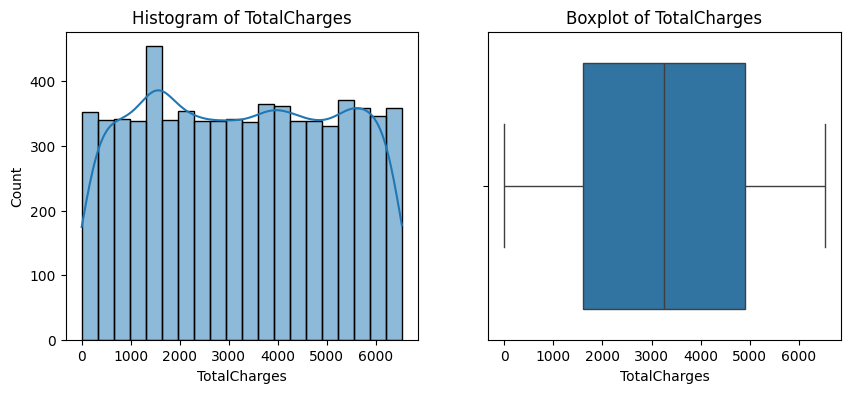

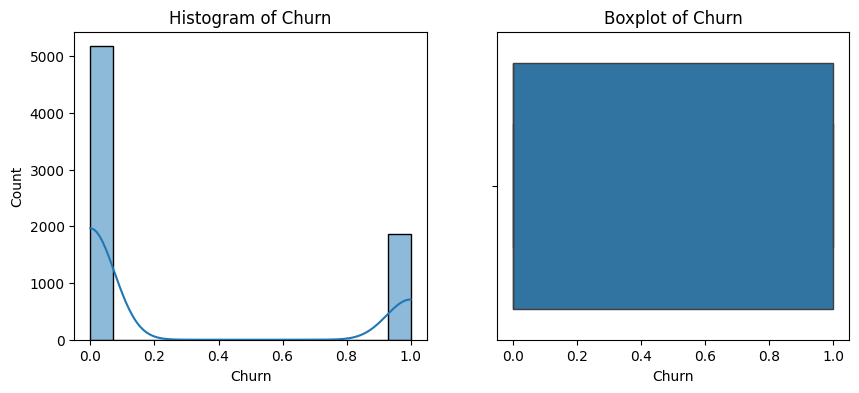

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.drop('customerID')

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
# Assuming 'df' is your DataFrame after loading the data
# Convert 'TotalCharges' to numeric, setting errors='coerce' to turn parsing failures into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# You could fill NaN values in 'TotalCharges' with the product of 'tenure' and 'MonthlyCharges'
# But first, make sure 'tenure' and 'MonthlyCharges' are also numeric.
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Now fill NaN values in 'TotalCharges'
df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)

# Drop non-numeric columns, particularly those like 'customerID'
df = df.select_dtypes(include=[np.number])

In [ ]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in gender: [0 1]
Unique values in SeniorCitizen: [0 1]
Unique values in Partner: [1 0]
Unique values in Dependents: [0 1]
Unique values in tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in PhoneService: [0 1]
Unique values in MultipleLines: [1 0 2]
Unique values in InternetService: [0 1 2]
Unique values in OnlineSecurity: [0 2 1]
Unique values in OnlineBackup: [2 0 1]
Unique values in DeviceProtection: [0 2 1]
Unique values in TechSupport: [0 2 1]
Unique values in StreamingTV: [0 2 1]
Unique values in StreamingMovies: [0 2 1]
Unique values in Contract: [0 1 2]
Unique values in PaperlessBilling: [1 0]
Unique values in PaymentMethod: [2 3 0 1]
Unique values in MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Unique values in TotalCharges: [2505 1466  157 ... 2994 2660 5

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']
print(X)
print(y)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model
clf.fit(X_scaled, y)

# Perform feature selection
selector = SelectFromModel(clf, threshold="median")
X_selected = selector.fit_transform(X_scaled, y)


# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)


Selected Features: Index(['gender', 'tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


In [ ]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
X_selected

array([[-1.00955867, -1.27744458, -1.18323364, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183,  0.06632742, -1.18323364, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -1.23672422, -1.18323364, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.87024095, -1.18323364, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183, -1.15528349,  0.17225018, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183,  1.36937906,  0.17225018, ..., -1.47405205,
         1.35896134,  1.13801338]])

In [ ]:
X_test_selected

array([[-1.00955867, -1.27744458, -1.18323364, ...,  0.39855772,
        -1.32816441, -0.642709  ],
       [ 0.99053183,  0.35136997,  1.527734  , ..., -1.47405205,
        -1.31320824,  1.72841048],
       [-1.00955867,  0.79929397,  1.527734  , ...,  1.33486261,
        -1.50930029, -1.68953865],
       ...,
       [ 0.99053183, -0.62591876,  1.527734  , ..., -1.47405205,
        -1.49102052, -0.21275165],
       [-1.00955867,  1.49154015, -1.18323364, ..., -0.53774716,
        -0.69169616, -0.37160288],
       [ 0.99053183, -1.27744458, -1.18323364, ...,  1.33486261,
        -1.11046901, -0.2969428 ]])

In [ ]:
def evaluate_model(models, X_train_selected, y_train, X_test_selected, y_test, title, graph=True):
    y_pred = model.predict(X_test_selected)
    train_matrix = confusion_matrix(y_train, model.predict(X_train_selected))
    test_matrix = confusion_matrix(y_test, model.predict(X_test_selected))

    if graph:
        # Plotting heatmaps for confusion matrices
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
        sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False, ax=ax1)
        sns.heatmap(test_matrix, annot=True, fmt=".1f", cbar=False, ax=ax2)

        # Set titles and labels
        ax1.set_title(f'{title} - Train Set')
        ax1.set_xlabel('Predicted Label')
        ax1.set_ylabel('True Label')

        ax2.set_title(f'{title} - Test Set')
        ax2.set_xlabel('Predicted Label')

        # Show the plots
        plt.show()

    # Printing error table with metrics
    print(f"\t\tError Table for {title}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"\t\tError Table for {title}")
    print('Accuracy on Training set :', accuracy_score(y_train, model.predict(X_train_selected)))
    print('Accuracy on Testing set  :', accuracy_score(y_test, model.predict(X_test_selected)))
    print('Recall Ratio             :', recall_score(y_test, model.predict(X_test_selected),pos_label = 1)*100, '%')
    print('AUC Score                :', roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1])*100, '%')

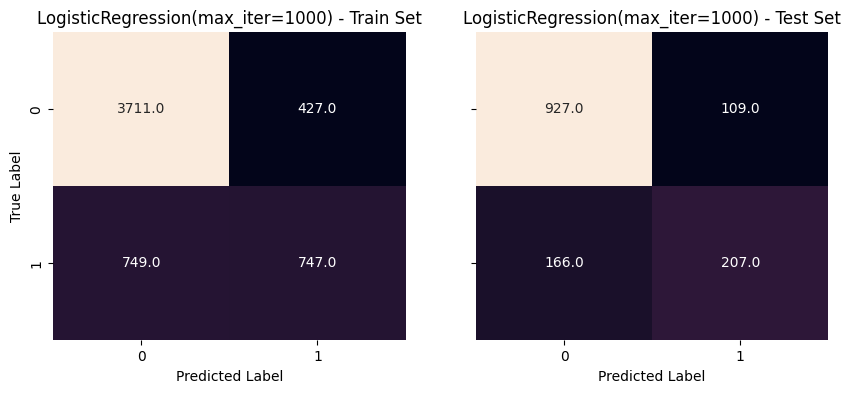

		Error Table for LogisticRegression(max_iter=1000)
Accuracy: 0.8048261178140526
Precision: 0.6550632911392406
Recall: 0.5549597855227882
F1 Score: 0.6008708272859217
		Error Table for LogisticRegression(max_iter=1000)
Accuracy on Training set : 0.7912673056443025
Accuracy on Testing set  : 0.8048261178140526
Recall Ratio             : 55.49597855227882 %
AUC Score                : 85.34371215336361 %


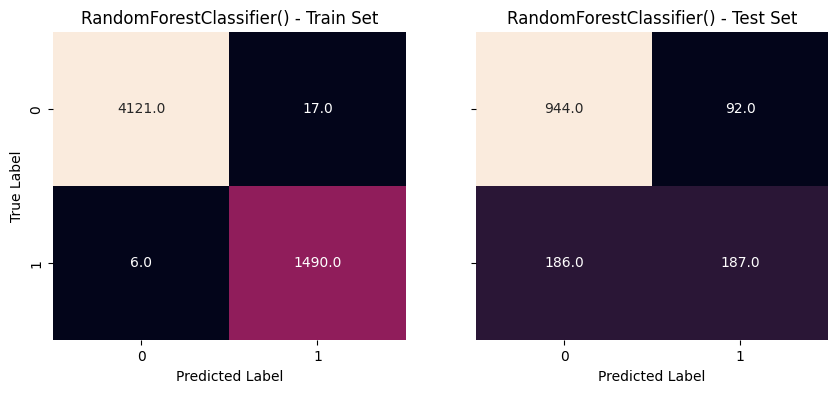

		Error Table for RandomForestClassifier()
Accuracy: 0.8026969481902059
Precision: 0.6702508960573477
Recall: 0.5013404825737265
F1 Score: 0.5736196319018404
		Error Table for RandomForestClassifier()
Accuracy on Training set : 0.9959176428824991
Accuracy on Testing set  : 0.8026969481902059
Recall Ratio             : 50.134048257372655 %
AUC Score                : 84.14504124959889 %


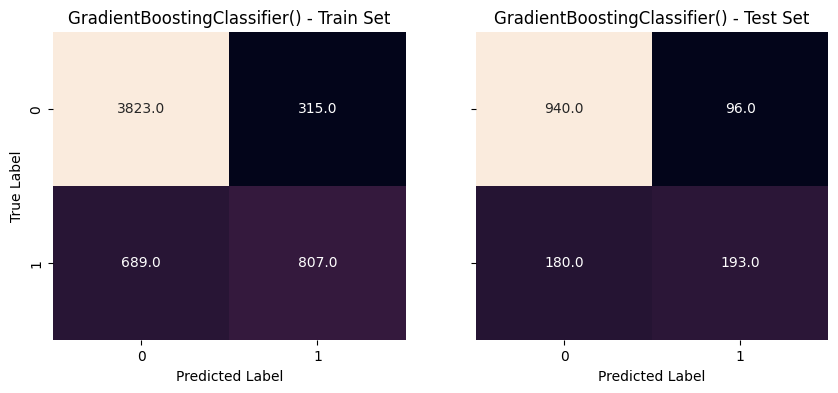

		Error Table for GradientBoostingClassifier()
Accuracy: 0.8041163946061036
Precision: 0.6678200692041523
Recall: 0.517426273458445
F1 Score: 0.5830815709969789
		Error Table for GradientBoostingClassifier()
Accuracy on Training set : 0.8217962371317004
Accuracy on Testing set  : 0.8041163946061036
Recall Ratio             : 51.742627345844504 %
AUC Score                : 85.71635595764283 %


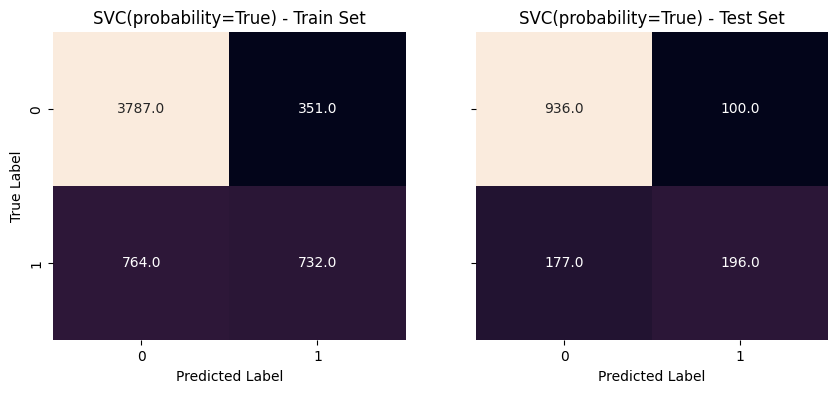

		Error Table for SVC(probability=True)
Accuracy: 0.8034066713981547
Precision: 0.6621621621621622
Recall: 0.5254691689008043
F1 Score: 0.5859491778774291
		Error Table for SVC(probability=True)
Accuracy on Training set : 0.8020944266950657
Accuracy on Testing set  : 0.8034066713981547
Recall Ratio             : 52.54691689008043 %
AUC Score                : 80.61087705859823 %


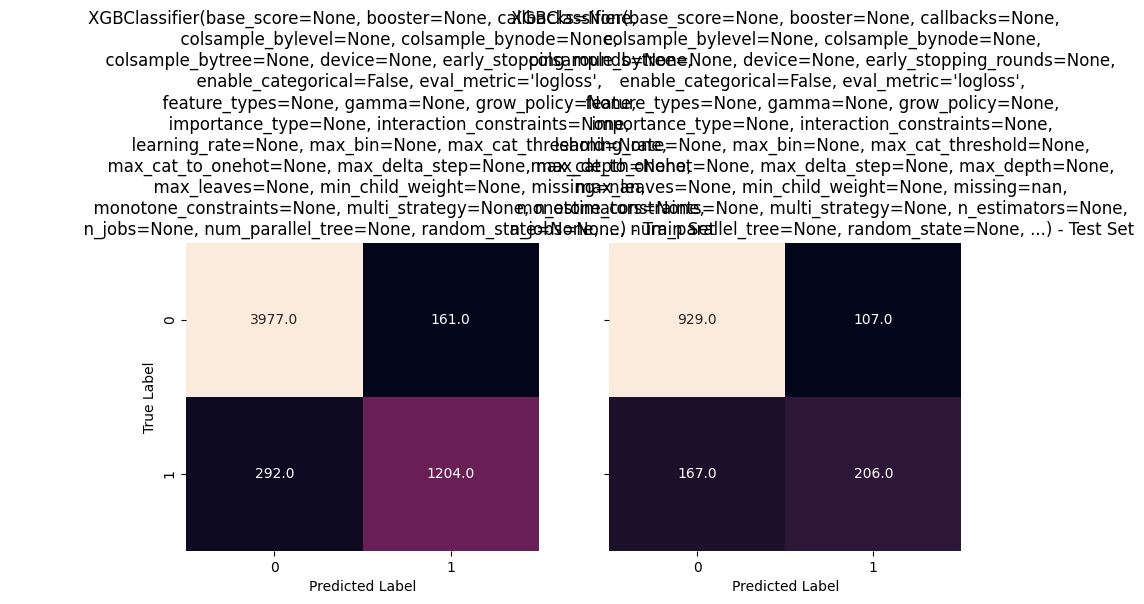

		Error Table for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
Accuracy: 0.8055358410220014
Precision: 0.65814696485623
Recall: 0.5522788203753352
F1 Score: 0.6005830903790088
		Error Table for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_byl

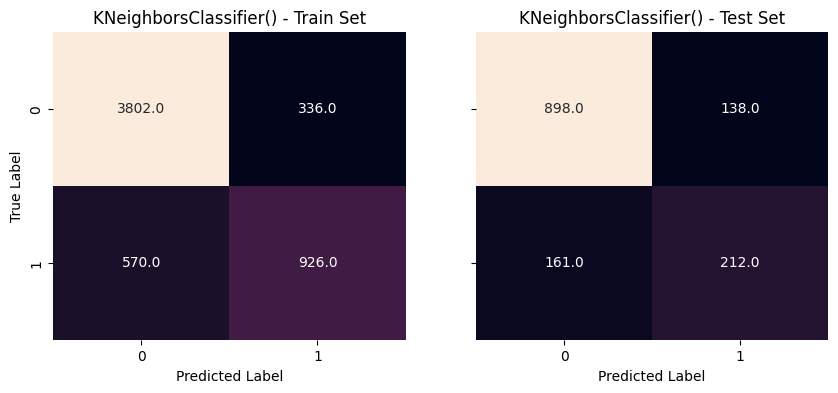

		Error Table for KNeighborsClassifier()
Accuracy: 0.7877927608232789
Precision: 0.6057142857142858
Recall: 0.5683646112600537
F1 Score: 0.5864453665283541
		Error Table for KNeighborsClassifier()
Accuracy on Training set : 0.8391906283280085
Accuracy on Testing set  : 0.7877927608232789
Recall Ratio             : 56.83646112600537 %
AUC Score                : 79.41699359259682 %


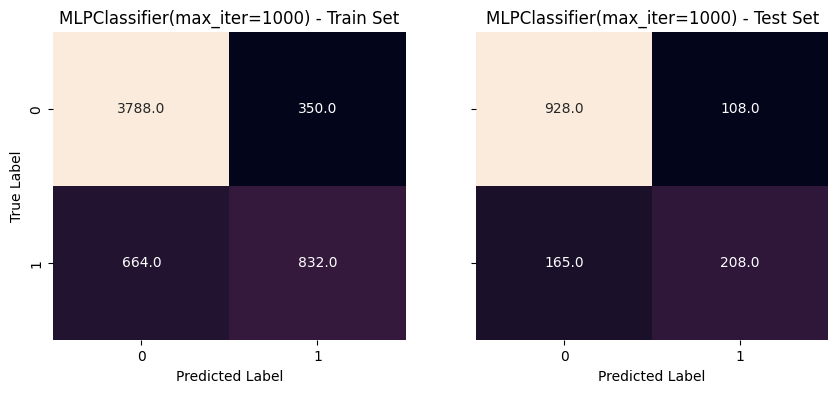

		Error Table for MLPClassifier(max_iter=1000)
Accuracy: 0.8062455642299503
Precision: 0.6582278481012658
Recall: 0.5576407506702413
F1 Score: 0.6037735849056605
		Error Table for MLPClassifier(max_iter=1000)
Accuracy on Training set : 0.820021299254526
Accuracy on Testing set  : 0.8062455642299503
Recall Ratio             : 55.76407506702413 %
AUC Score                : 84.91077251130869 %


In [ ]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVC': SVC(probability=True),  # Enable probability estimates
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'KNN': KNeighborsClassifier(),
    'MLPClassifier': MLPClassifier(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    train_matrix = confusion_matrix(y_train, model.predict(X_train_selected))
    test_matrix = confusion_matrix(y_test, model.predict(X_test_selected))
    evaluate_model(model, X_train_selected, y_train, X_test_selected, y_test, title=model)



In [ ]:

model_accuracies = {}
for name, model in models.items():

    model.fit(X_train_selected, y_train)

    y_pred = model.predict(X_test_selected)


    accuracy = accuracy_score(y_test, y_pred)


    model_accuracies[name] = accuracy



# Find the model with the highest accuracy score
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

# Print the name of the best model and its accuracy
print(f"Best model: {best_model_name} with accuracy: {best_accuracy:.4f}")

Best model: MLPClassifier with accuracy: 0.8062


# **Hyperparameter Tuning**

In [ ]:


X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


models_params = {
    'LogisticRegression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [0.1, 1, 10],
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, None]
        }
    },
    'SVC': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7]
        }
    },
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.01],
            'max_depth': [3, 5, 7]
        }
    },
    'MLPClassifier': {
        'model': MLPClassifier(),
        'params': {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.0001],
    'max_iter': [1000],
    'tol': [0.0001],
    'early_stopping': [True],
    'n_iter_no_change': [10],
    'validation_fraction': [0.1],
        }
    }
}


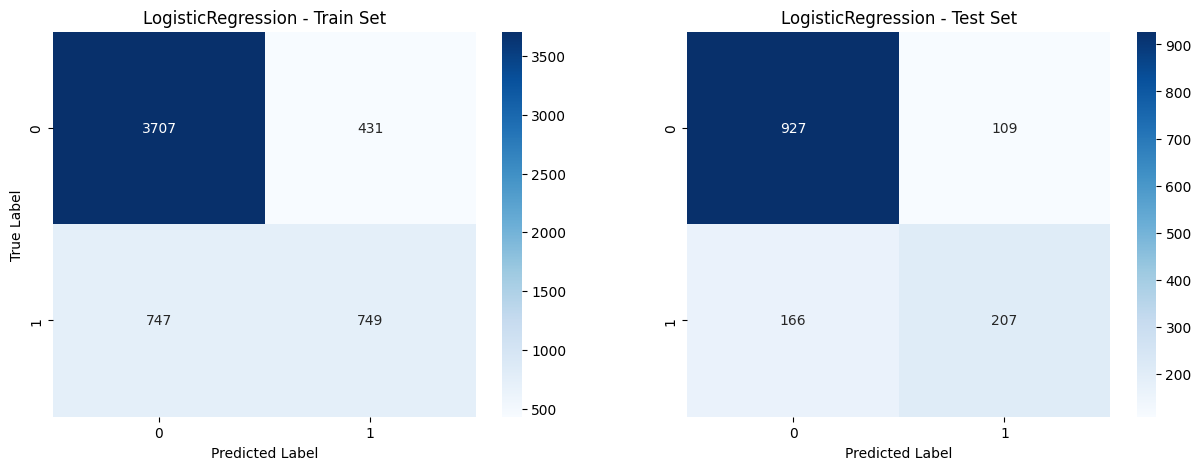

Error Table for LogisticRegression

Accuracy: 0.8048261178140526
Precision: 0.6550632911392406
Recall: 0.5549597855227882
F1 Score: 0.6008708272859217

Accuracy on Training set: 0.7909123180688676
Accuracy on Testing set: 0.8048261178140526
Recall Ratio: 55.49597855227882 %
AUC Score: 85.34397093378328 %



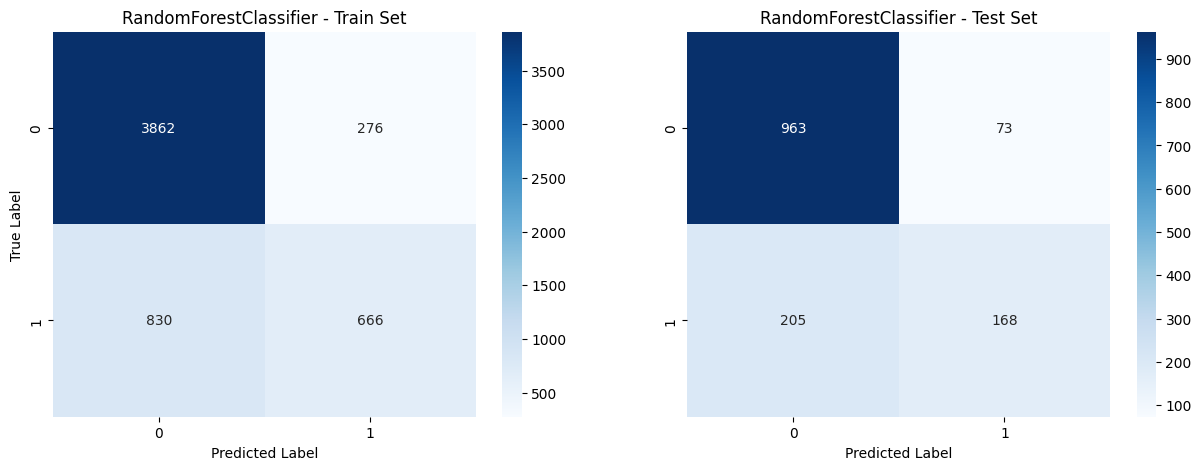

Error Table for RandomForestClassifier

Accuracy: 0.8026969481902059
Precision: 0.6970954356846473
Recall: 0.450402144772118
F1 Score: 0.5472312703583062

Accuracy on Training set: 0.8036918707845225
Accuracy on Testing set: 0.8026969481902059
Recall Ratio: 45.0402144772118 %
AUC Score: 86.09378719968531 %



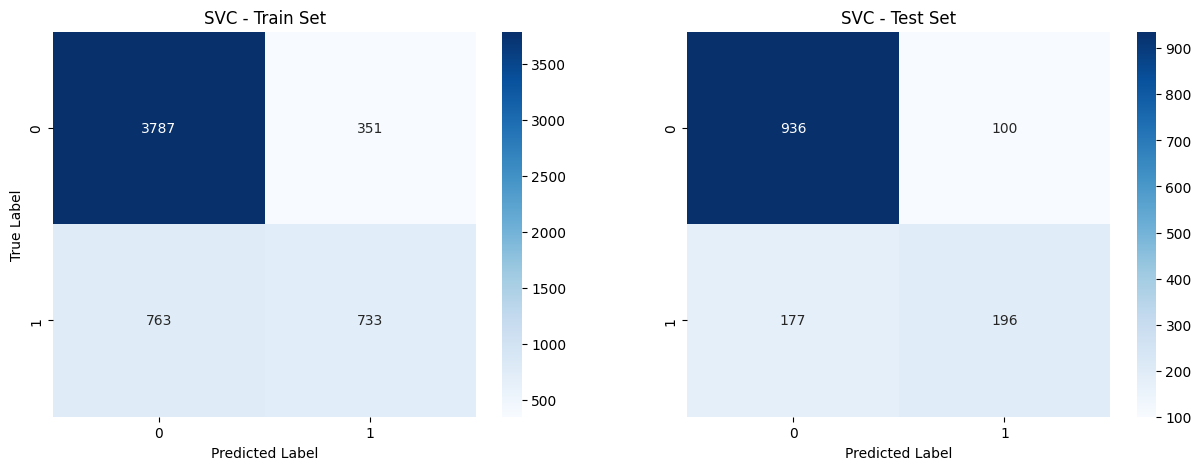

Error Table for SVC

Accuracy: 0.8034066713981547
Precision: 0.6621621621621622
Recall: 0.5254691689008043
F1 Score: 0.5859491778774291

Accuracy on Training set: 0.8022719204827831
Accuracy on Testing set: 0.8034066713981547
Recall Ratio: 52.54691689008043 %
AUC Score: 80.58888072292898 %



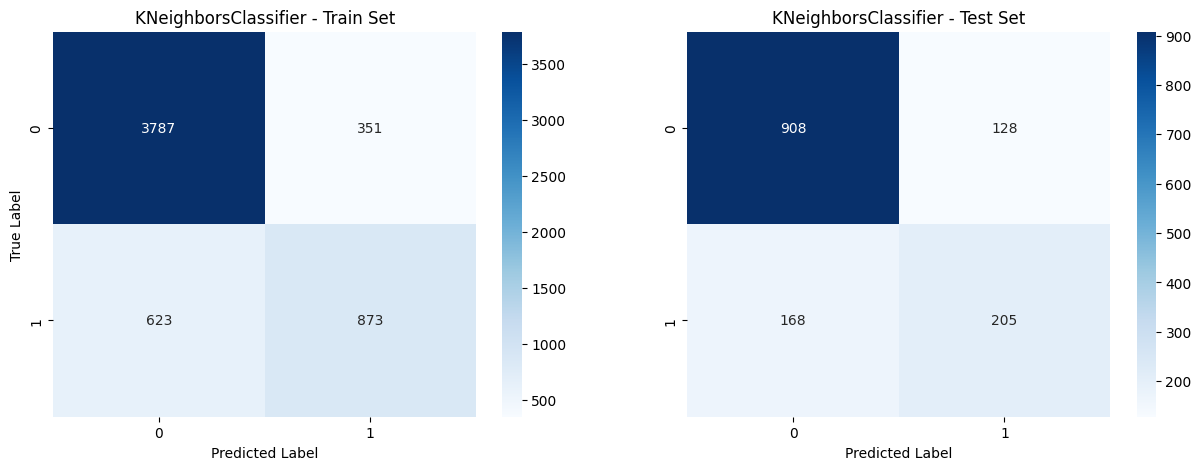

Error Table for KNeighborsClassifier

Accuracy: 0.7899219304471257
Precision: 0.6156156156156156
Recall: 0.5495978552278821
F1 Score: 0.5807365439093485

Accuracy on Training set: 0.8271210507632233
Accuracy on Testing set: 0.7899219304471257
Recall Ratio: 54.95978552278821 %
AUC Score: 80.50154233130104 %



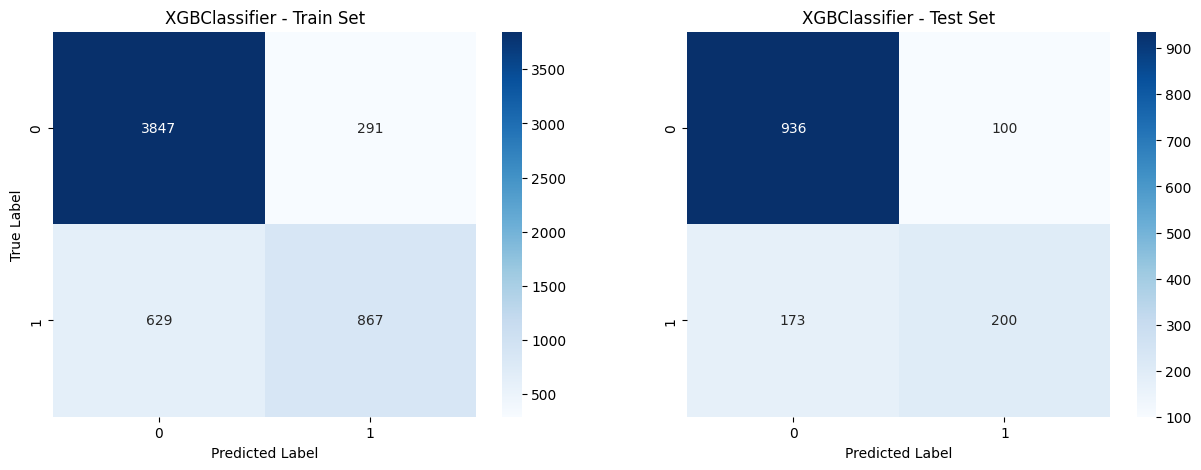

Error Table for XGBClassifier

Accuracy: 0.8062455642299503
Precision: 0.6666666666666666
Recall: 0.5361930294906166
F1 Score: 0.5943536404160475

Accuracy on Training set: 0.8367057152999645
Accuracy on Testing set: 0.8062455642299503
Recall Ratio: 53.61930294906166 %
AUC Score: 85.76901777303921 %



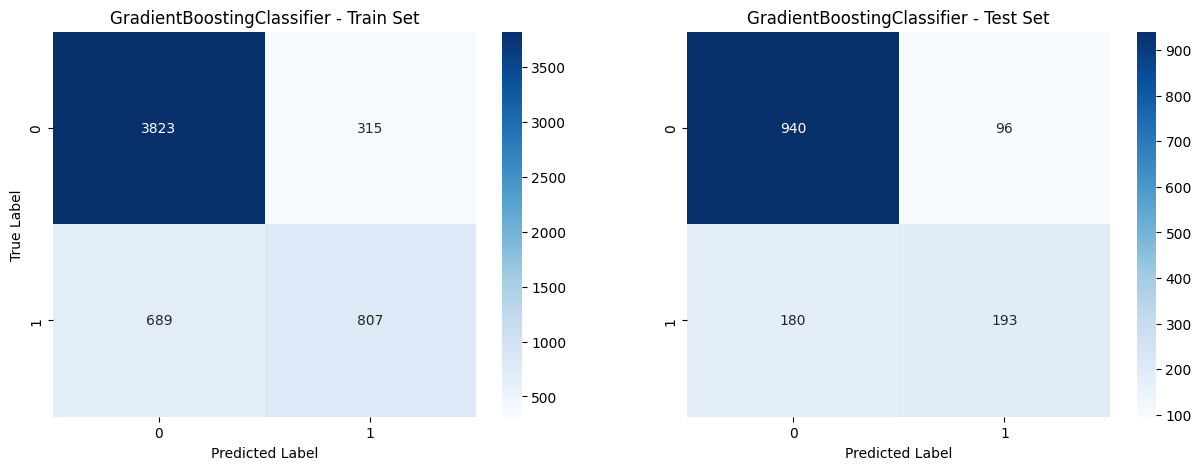

Error Table for GradientBoostingClassifier

Accuracy: 0.8041163946061036
Precision: 0.6678200692041523
Recall: 0.517426273458445
F1 Score: 0.5830815709969789

Accuracy on Training set: 0.8217962371317004
Accuracy on Testing set: 0.8041163946061036
Recall Ratio: 51.742627345844504 %
AUC Score: 85.76668874926247 %



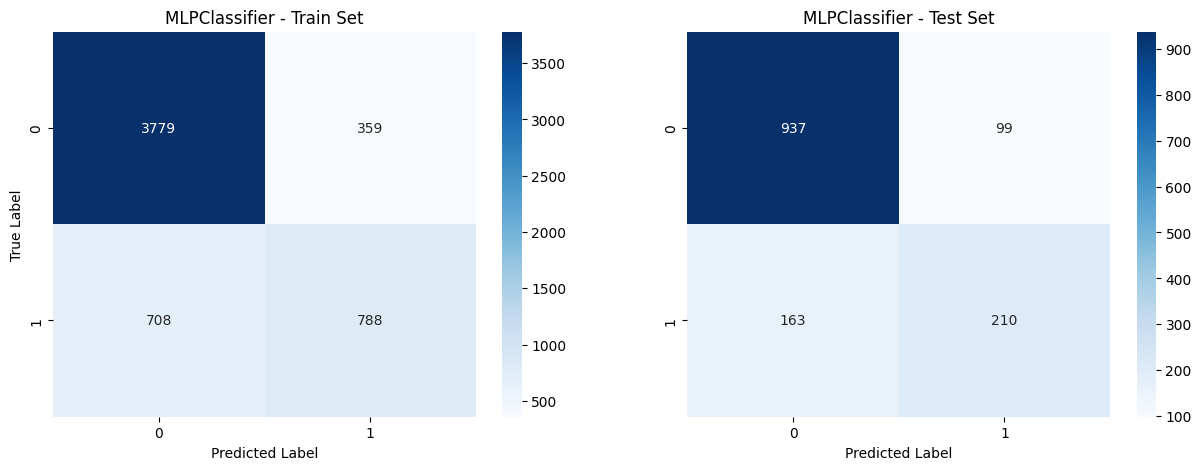

Error Table for MLPClassifier

Accuracy: 0.8140525195173882
Precision: 0.6796116504854369
Recall: 0.5630026809651475
F1 Score: 0.6158357771260998

Accuracy on Training set: 0.8106141285055023
Accuracy on Testing set: 0.8140525195173882
Recall Ratio: 56.30026809651475 %
AUC Score: 85.60973842475182 %



In [ ]:
best_models = {}
for model_name, mp in models_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', return_train_score=False)
    clf.fit(X_train_scaled, y_train)

    best_models[model_name] = clf.best_estimator_

    # Evaluation
    y_pred_train = best_models[model_name].predict(X_train_scaled)
    y_pred_test = best_models[model_name].predict(X_test_scaled)
    y_pred_test_proba = best_models[model_name].predict_proba(X_test_scaled)[:, 1] if hasattr(best_models[model_name], "predict_proba") else [0]*len(y_test)

 # Scores
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    auc = roc_auc_score(y_test, y_pred_test_proba)

    train_matrix = confusion_matrix(y_train, y_pred_train)
    test_matrix = confusion_matrix(y_test, y_pred_test)


    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.heatmap(train_matrix, annot=True, fmt='g', ax=ax[0], cmap='Blues')
    ax[0].set_title(f'{model_name} - Train Set')
    ax[0].set_xlabel('Predicted Label')
    ax[0].set_ylabel('True Label')

    sns.heatmap(test_matrix, annot=True, fmt='g', ax=ax[1], cmap='Blues')
    ax[1].set_title(f'{model_name} - Test Set')
    ax[1].set_xlabel('Predicted Label')

    plt.show()


    print(f'Error Table for {model_name}\n')
    print(f'Accuracy: {test_acc}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}\n')
    print(f'Accuracy on Training set: {train_acc}')
    print(f'Accuracy on Testing set: {test_acc}')
    print(f'Recall Ratio: {recall * 100} %')
    print(f'AUC Score: {auc * 100} %\n')

best_mlp_model = best_models['MLPClassifier']


In [ ]:

model_accuracies1 = {}


for model_name, model in best_models.items():
    y_pred_test = model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, y_pred_test)
    model_accuracies1[model_name] = test_acc

best_model_name = max(model_accuracies1, key=model_accuracies1.get)
best_model = best_models[best_model_name]
best_accuracy = model_accuracies1[best_model_name]

print(f"Best model: {best_model_name} with accuracy: {best_accuracy:.4f}")


if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_


    feature_importance_pairs = zip(X, importances)


    sorted_features = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)


    top_two_features = [feature[0] for feature in sorted_features[:2]]
    least_important_features = [feature[0] for feature in sorted_features[-2:]]

    print(f"The two most significant predictors of churn are: {top_two_features[0]} and {top_two_features[1]}")
    print(f"The two least important predictors of churn are: {least_important_features[0]} and {least_important_features[1]}")
else:
    print(f"The model {best_model_name} does not support feature importance.")


Best model: MLPClassifier with accuracy: 0.8141
The model MLPClassifier does not support feature importance.
